In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import dash
import random
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)

## Load the dataset

In [2]:
student_data = pd.read_csv("students_adaptability_level_online_education.csv")
student_data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


# Data Statistics

In [3]:
student_data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
# Change the gender to Male and Female,the financial condition variable to middel,lower and upper
student_data.replace("Boy","Male",inplace=True)
student_data.replace("Girl","Female",inplace = True)
student_data.replace("Mid","Middle",inplace=True)
student_data.replace("Poor","Lower",inplace=True)
student_data.replace("Rich","Upper",inplace=True)

## Exploratory Analysis of Data

In this section, we will look at the distributions of each feature in the dataset and how does them affect the target variabale i.e.adaptivity level. We create interactive plots to show the relationships between target and each feature.

In [6]:
student_data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle,Wifi,4G,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle,Wifi,4G,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower,Mobile Data,3G,0,No,Mobile,Low


In [7]:
student_data['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [8]:
# Interactive plots
# target variable plots

fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = student_data['Adaptivity Level'].value_counts().values.tolist(),
                      x = student_data['Adaptivity Level'].value_counts().index, 
                      text=student_data['Adaptivity Level'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False),row = 1,col = 1)
fig.add_trace((go.Pie(labels=student_data['Adaptivity Level'].value_counts().keys(),
                             values=student_data['Adaptivity Level'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.show()
#fig.write_html("target_variable.html")

In [9]:
# Interactive plots
# How does sex affect students adaptivity level?
sex = ["Male", "Female"]
low = student_data[student_data['Adaptivity Level'] == 'Low']['Gender'].value_counts().values.tolist()
moderate = student_data[student_data['Adaptivity Level'] == 'Moderate']['Gender'].value_counts().values.tolist()
high = student_data[student_data['Adaptivity Level'] == 'High']['Gender'].value_counts().values.tolist()

fig = go.Figure(data=[
    go.Bar(name='Low', x=sex, y=low, text=low,textfont=dict(size=15),
                      textposition = 'outside'),
    go.Bar(name='Moderate', x=sex, y=moderate, text = moderate,textfont=dict(size=15),
                      textposition = 'outside'),
    go.Bar(name = "High", x = sex, y = high, text = high,textfont=dict(size=15),
                      textposition = 'outside')
])
fig.update_layout(barmode='group', title=dict(text = "Adaptivity Level for Genders",x=0.5,y=0.95))
fig.show()
#fig.write_html("gender_effect.html")

In [10]:
# Interactive plots
# How does each feature affect the adaptivity level
i = 1
for feature in student_data:
    fig = px.histogram(student_data, x=feature, color="Adaptivity Level",barmode='group',text_auto='.2s',
                      title= str(feature + " effect of Adaptivity Level")) 
    fig.show()
    if feature == "Age":
        fig.write_html("age_effect.html")
    elif feature == "Financial Condition":
        fig.write_html("financial_effect.html")
    elif feature == "Class Duration":
        fig.write_html("class_effect.html")
    i +=1

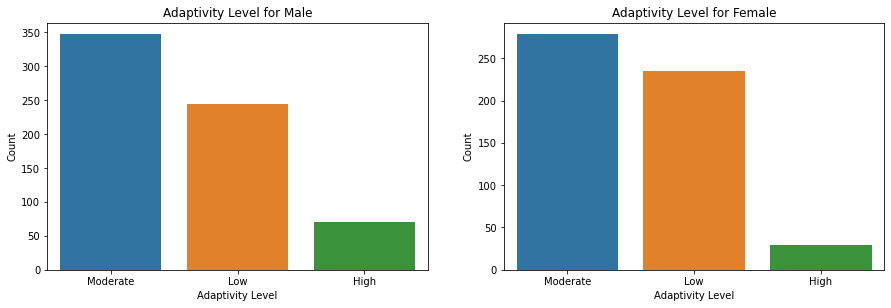

In [11]:
# General plots
# Gender effects for adaptivity level
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = student_data[student_data.Gender == "Male"]['Adaptivity Level'] ,  data = student_data)
plt.title("Adaptivity Level for Male")
plt.xlabel("Adaptivity Level")
plt.ylabel("Count")

plt.subplot(2,2,2)
sns.countplot(x = student_data[student_data.Gender == "Female"]['Adaptivity Level'] ,  data = student_data)
plt.title("Adaptivity Level for Female")
plt.xlabel("Adaptivity Level")
plt.ylabel("Count")

plt.show()

Observations: 
- Males tend to digest new knowledge faster compared to females and the level of low adaptativity level is almost the same for both genders.
- The optimal age range of learning for students is from 11-15 and 21-25, among them, 21-15 is the range that more students reach high adaptivity level compared with other age range. 
- Class duration is best to be 1-3 hours for students to capture knowledges.
- Self limitation is also important in online education. Internet quality is also important for adapting new knowledge. 
- One interesting thing is that people in middle class has the most number of adapting materials.


# Data preparation

In this section, we will further modify our data in order to fit the models. Since all of the columns are categrical variables, we need to encode the labels first.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from collections import defaultdict
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay, plot_roc_curve, auc
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay

### Converting categories to numerical value

In [11]:
# Categorical to numeric conversion
enc = LabelEncoder()
student_data.Gender = enc.fit_transform(student_data.Gender)
student_data["Education Level"] = enc.fit_transform(student_data["Education Level"])
student_data["Institution Type"] = enc.fit_transform(student_data["Institution Type"])
student_data["IT Student"] = enc.fit_transform(student_data["IT Student"])
student_data["Location"] = enc.fit_transform(student_data["Location"])
student_data["Load-shedding"] = enc.fit_transform(student_data["Load-shedding"])
student_data["Financial Condition"] = enc.fit_transform(student_data["Financial Condition"])
student_data["Internet Type"] = enc.fit_transform(student_data["Internet Type"])
student_data["Network Type"] = enc.fit_transform(student_data["Network Type"])
student_data["Class Duration"] = enc.fit_transform(student_data["Class Duration"])
student_data["Self Lms"] = enc.fit_transform(student_data["Self Lms"])
student_data["Device"] = enc.fit_transform(student_data["Device"])
student_data["Adaptivity Level"] = enc.fit_transform(student_data["Adaptivity Level"])
student_data["Age"] = enc.fit_transform(student_data["Age"])

### Check whether the target variable is balanced or not
Balanced data is good for classification model to improve prediction accuracy. In other words, imbalanced data set will lead algorithms to get good results by returning the majority.

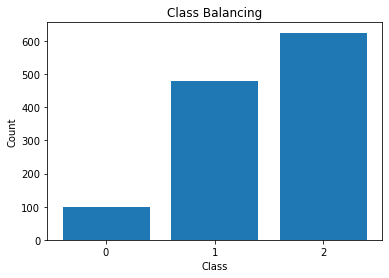

In [14]:
# Checking the count for each class
un, counts = np.unique(student_data["Adaptivity Level"],return_counts=True)
plt.bar([str(i) for i in un], counts)
plt.title("Class Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [12]:
# Unbalanced dataset, apply oversampling to make it balanced
oversample = SMOTE()
features, labels = oversample.fit_resample(student_data.drop(["Adaptivity Level"],axis=1),student_data["Adaptivity Level"])

In [13]:
# Train test split
X_train, X_test, Y_train, Y_test  = train_test_split(features, labels, test_size=0.3, shuffle=True)

# Classification Modeling
In this section, we will apply four types of models and grid search for the optimal parameters for each of them:
- Baseline model: Logistic regression
- Random Forest
- Support Vector Classifier
- Xgboost

### Logistic Regression

We start with the logistic regression as our baseline model, because this is the simple and basic model which could give us a quick, solid results. 

To build the logistic regression, we use it from sklearn.linear\_model and tune the parameters by grid search. The GridSearchCV is a method that tries all the combination of the candidate parameters and train the model.  In this case, we specify 5-folds cross validation. 

The search parameter will be: 

$\text{'max\_iter':[50, 100, 200, 500, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}$

The evaluation metric is the precision, recall and f1-score. We want to make prediction on each class as accurate as possible, so we also care more about the percentge of each correctly predicted class. To visualize the precentges, we could plot the confusion matrix with number of each correctly predicted class.

In [14]:
# Grid Search function
def grid_search(X, y, model, para_grid):
    grid = GridSearchCV(model, para_grid,cv=5,scoring='f1_macro')
    grid.fit(X,y)

    return grid

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       177
           1       0.67      0.73      0.70       181
           2       0.69      0.61      0.65       205

    accuracy                           0.67       563
   macro avg       0.67      0.67      0.67       563
weighted avg       0.67      0.67      0.67       563



Best parameters: {'max_iter': 50, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       177
           1       0.67      0.73      0.70       181
           2       0.69      0.61      0.65       205

    accuracy                           0.67       563
   macro avg       0.67      0.67      0.67       563
weighted avg       0.67      0.67      0.67       563



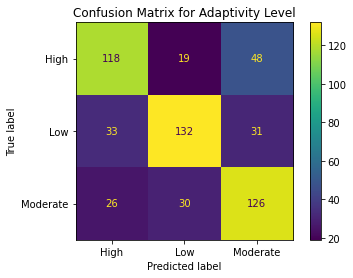

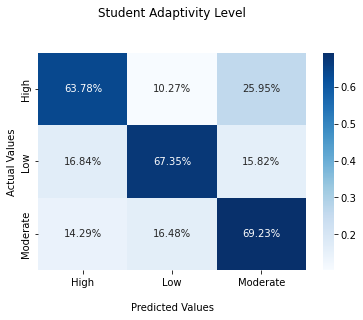

In [15]:
# Logistic Regression

lr_param_grid = {'max_iter':[50, 100, 200, 500, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)
print(classification_report(Y_test,y_pred, zero_division=1))

# Grid Search for logistic regression
grid_lr = grid_search(X_train, Y_train, LogisticRegression(random_state=45), lr_param_grid)
grid_y_pred = grid_lr.predict(X_test)
best_params_lr = grid_lr.best_params_
print(f"Best parameters: {best_params_lr}")
print(classification_report(Y_test,grid_y_pred, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(grid_y_pred,Y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix for Adaptivity Level")
plt.show()

# Convert to percentges
percent_matrix = []
for i in range(len(cm)):
    percent_matrix.append(cm[i]/sum(cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

In [19]:
data = cm
fig = px.imshow(data,text_auto=True, width=800, height=800, title="Student Adaptivity Level for logistic regression", labels=dict(x="Predicted Values", y="Actual Values"), 
                x=["High","Low","Moderate"],
                y=["High","Low","Moderate"],
                color_continuous_scale="Blues")
fig.write_html("cm_lr.html")

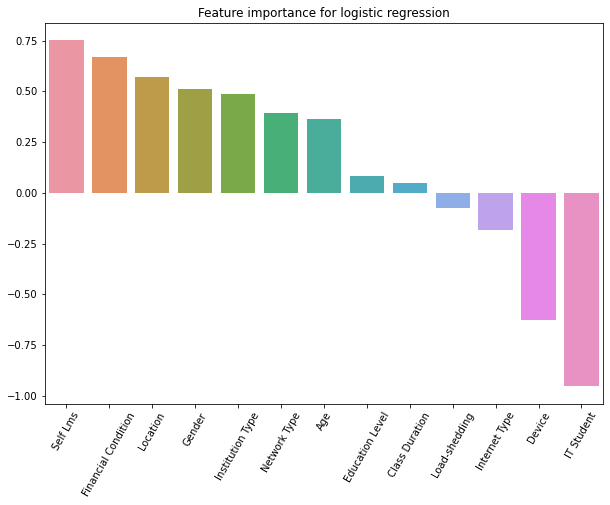

In [20]:
# Feature importance
best_est_lr = grid_lr.best_estimator_
feature_names = features.columns

feat_imps = zip(feature_names, best_est_lr.coef_[0])

feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
plt.figure(figsize=(10,7))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=60)
ax.set_title('Feature importance for logistic regression')

plt.savefig('lr_imps.png',dpi=72,bbox_inches='tight')
plt.show()


### Random Forest

In this section, we use random forest from sklearn library and tune the parameters by grid search. The GridSearchCV is  a method that tries all the combination of the candidate parameters and train the model through cross validation.  In this case, we specify 5-folds cross validation.

The search parameter will be:

"n\_estimators": [145, 150, 155, 160], "max\_depth": [10,13,14,15]

The evaluation metric is the precision, recall and f1-score. We want to make prediction on each class as accurate as possible, so we also care more about the percentge of each correctly predicted class. To visualize the precentges, we could plot the confusion matrix with number of each correctly predicted class.

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.96      0.91      0.93       181
           2       0.90      0.91      0.91       205

    accuracy                           0.93       563
   macro avg       0.93      0.93      0.93       563
weighted avg       0.93      0.93      0.93       563



Best parameters: {'max_depth': 14, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.93      0.93      0.93       181
           2       0.92      0.88      0.90       205

    accuracy                           0.93       563
   macro avg       0.93      0.93      0.93       563
weighted avg       0.93      0.93      0.93       563



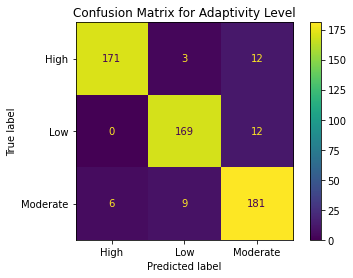

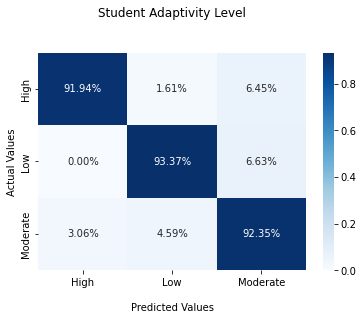

In [22]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(Y_test,y_pred, zero_division=1))

# Grid Search for rf
rf_param_grid = {"n_estimators": [145, 150, 155, 160], "max_depth": [10,13,14,15]}
grid_rf = grid_search(X_train, Y_train, RandomForestClassifier(random_state=45), rf_param_grid)
grid_y_pred = grid_rf.predict(X_test)
best_params_rf = grid_rf.best_params_
print(f"Best parameters: {best_params_rf}")
print(classification_report(Y_test,grid_y_pred, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(grid_y_pred,Y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix for Adaptivity Level")
plt.show()

# Convert to percentges
percent_matrix = []
for i in range(len(cm)):
    percent_matrix.append(cm[i]/sum(cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

In [22]:
data = cm
fig = px.imshow(data,text_auto=True, width=800, height=800, title="Student Adaptivity Level for random forest", labels=dict(x="Predicted Values", y="Actual Values"),x=["High","Low","Moderate"],
                y=["High","Low","Moderate"],
                color_continuous_scale="Blues")
fig.write_html("cm_rf.html")

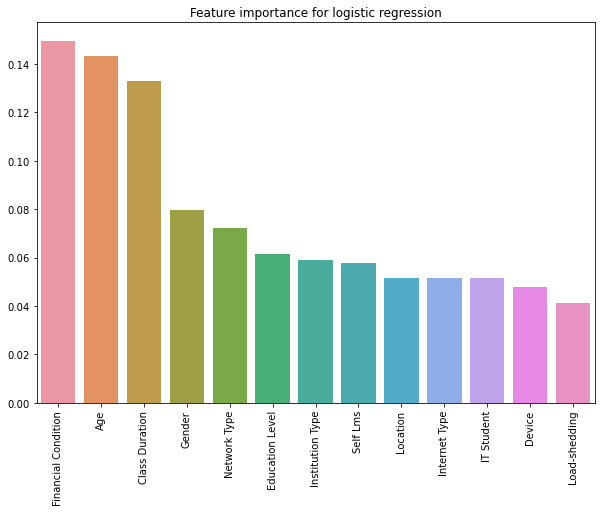

In [23]:
# Feature importance
best_est_rf = grid_rf.best_estimator_
feature_names = features.columns

feat_imps = zip(feature_names, best_est_rf.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
plt.figure(figsize=(10,7))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

ax.set_title('Feature importance for logistic regression')
plt.savefig('rf_imps.png', dpi=72, bbox_inches='tight')
plt.show()


### Support Vector Classifier

In this section, we use Support Vector Classifier from sklearn.svm library and tune the parameters by grid search. The GridSearchCV is  a method that tries all the combination of the candidate parameters and train the model through cross validation.  In this case, we specify 5-folds cross validation.

The search parameter will be:

$\text{'C': [0.1, 1, 2], 'gamma': [0.1,0.001,0.01],'degree':[2,3,4],'kernel': ['rbf', 'poly', 'sigmoid]}$

The evaluation metric is the precision, recall and f1-score. We want to make prediction on each class as accurate as possible, so we also care more about the percentge of each correctly predicted class. To visualize the precentges, we could plot the confusion matrix with number of each correctly predicted class.
The feature importance is only avaliable when we use linear kernel, and nonlinear kernel does not allow us to calculate the feature importance due to the higher dimension.

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       177
           1       0.75      0.69      0.72       181
           2       0.63      0.60      0.61       205

    accuracy                           0.67       563
   macro avg       0.67      0.67      0.67       563
weighted avg       0.67      0.67      0.67       563



Best parameters: {'C': 2, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       177
           1       0.87      0.88      0.88       181
           2       0.89      0.78      0.83       205

    accuracy                           0.87       563
   macro avg       0.87      0.88      0.87       563
weighted avg       0.87      0.87      0.87       563



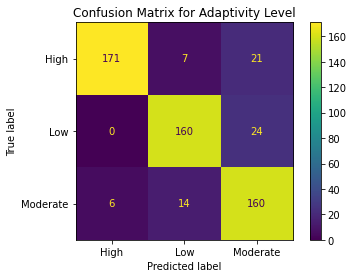

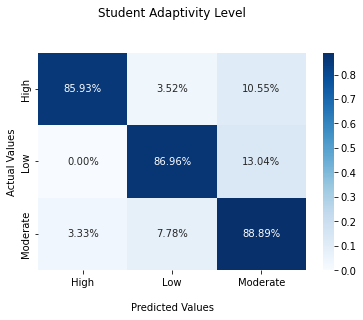

In [26]:
# SVC
svc_model = SVC(kernel = "linear")
svc_model.fit(X_train, Y_train)
y_pred = svc_model.predict(X_test)
print(classification_report(Y_test,y_pred, zero_division=1))

# Grid Search for svc
svc_param_grid = {'C': [0.1, 1, 2], 'gamma': [0.1,0.001,0.01],'degree':[2,3,4],'kernel': ['rbf', 'poly', 'sigmoid',"linear"]}
grid_svc = grid_search(X_train, Y_train, SVC(random_state=43), svc_param_grid)
grid_y_pred = grid_svc.predict(X_test)
best_params_svc = grid_svc.best_params_
print(f"Best parameters: {best_params_svc}")
print(classification_report(Y_test,grid_y_pred, zero_division=1))


# Confusion Matrix
cm = confusion_matrix(grid_y_pred,Y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix for Adaptivity Level")
plt.show()

# Convert to percentges
percent_matrix = []
for i in range(len(cm)):
    percent_matrix.append(cm[i]/sum(cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

In [25]:
data = cm
fig = px.imshow(data,text_auto=True, width=800, height=800, title="Student Adaptivity Level for SVC", labels=dict(x="Predicted Values", y="Actual Values"), 
                x=["High","Low","Moderate"],
                y=["High","Low","Moderate"],
                color_continuous_scale="Blues")
fig.write_html("cm_svc.html")

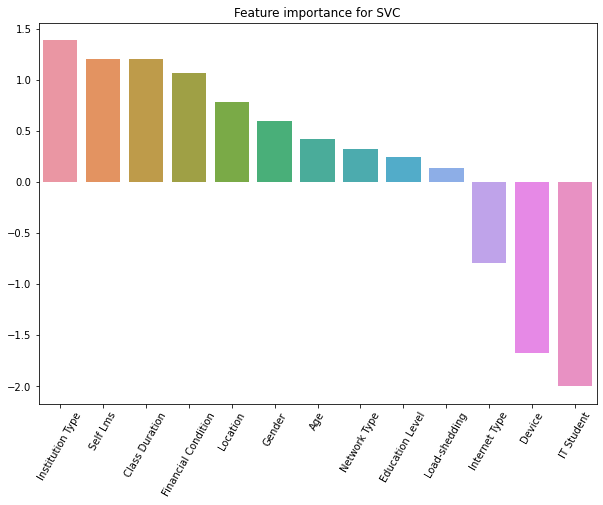

In [27]:
# Feature importance
feature_names = features.columns

feat_imps = zip(feature_names, svc_model.coef_[0])

feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
plt.figure(figsize=(10,7))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=60)
ax.set_title('Feature importance for SVC')
plt.savefig('svc_imps.png',dpi=72, bbox_inches='tight')
plt.show()


### Xgboost

Xgboost is a boosting method which could self-adjust by adding more weight on incorrect classified data and performs better in general. We use the Xgboost model from xgb library and apply the grid search for tuning the parameters. The GridSearchCV is  a method that tries all the combination of the candidate parameters and train the model through cross validation.  In this case, we specify 5-folds cross validation.

The search parameter will be:

'n\_estimators':[50, 150, 200],'learning\_rate':[0.01, 0.1, 1], 'max\_depth': [7, 9, 11]

The evaluation metric is the precision, recall and f1-score. We want to make prediction on each class as accurate as possible, so we also care more about the percentge of each correctly predicted class. To visualize the precentges, we could plot the confusion matrix with number of each correctly predicted class.

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.93      0.93      0.93       181
           2       0.92      0.88      0.90       205

    accuracy                           0.92       563
   macro avg       0.92      0.92      0.92       563
weighted avg       0.92      0.92      0.92       563



Best parameters: {'learning_rate': 1, 'max_depth': 9, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.93      0.93      0.93       181
           2       0.92      0.88      0.90       205

    accuracy                           0.93       563
   macro avg       0.93      0.93      0.93       563
weighted avg       0.93      0.93      0.93       563



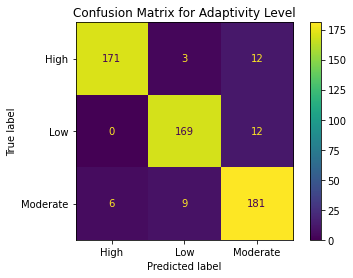

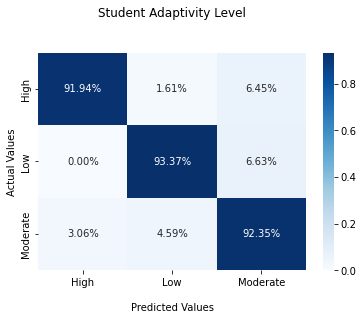

In [28]:
# Xgboost
xgb_model = xgb.XGBClassifier(random_state=43,eval_metric='mlogloss')
xgb_model.fit(X_train, Y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(Y_test,y_pred, zero_division=1))

# Grid Search for xgboost
xgb_param_grid = {'n_estimators':[50,150, 200],
                          'learning_rate':[0.01, 0.1, 1],
                          'max_depth': [7, 9, 11]}

grid_xgb = grid_search(X_train, Y_train, xgb.XGBClassifier(random_state=43,eval_metric='mlogloss'), xgb_param_grid)
grid_y_pred = grid_xgb.predict(X_test)
best_params_xgb = grid_xgb.best_params_
print(f"Best parameters: {best_params_xgb}")
print(classification_report(Y_test,grid_y_pred, zero_division=1))


# Confusion Matrix
cm = confusion_matrix(grid_y_pred,Y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix for Adaptivity Level")
plt.show()


# Convert to percentges
percent_matrix = []
for i in range(len(cm)):
    percent_matrix.append(cm[i]/sum(cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

In [28]:
data = cm
fig = px.imshow(data,text_auto=True, width=800, height=800, title="Student Adaptivity Level using Xgb", labels=dict(x="Predicted Values", y="Actual Values"),x=["High","Low","Moderate"],y=["High","Low","Moderate"],color_continuous_scale="Blues")

fig.write_html("cm_xgb.html")

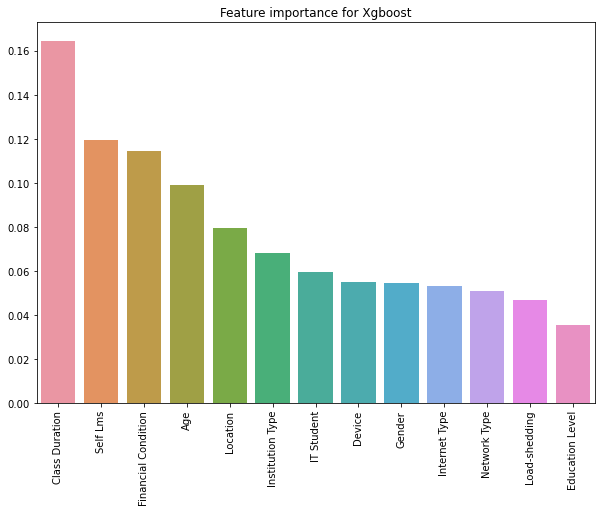

In [29]:
# Feature importance
best_est_xgb = grid_xgb.best_estimator_
feature_names = features.columns

feat_imps = zip(feature_names, best_est_xgb.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
plt.figure(figsize=(10,7))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

ax.set_title('Feature importance for Xgboost')
plt.savefig('xgb_imps.png',dpi=72, bbox_inches='tight')
plt.show()


## Comparing Models
We could compare the classificatiion results for each class in each model, and it turns out that the Xgboost and Random forest perform best. As for the feature importance, both Xgboost and Random forest include class duration, age and financial condition in top 5

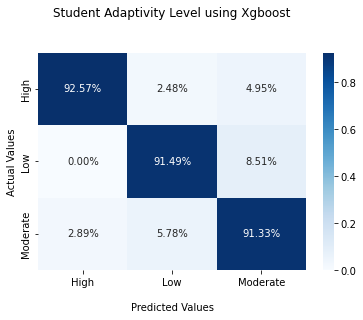

In [31]:
xgb_y_pred = grid_xgb.predict(X_test)
xgb_cm = confusion_matrix(xgb_y_pred,Y_test)

percent_matrix = []
for i in range(len(xgb_cm)):
    percent_matrix.append(cm[i]/sum(xgb_cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level using Xgboost\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

data = percent_matrix
fig = px.imshow(data,text_auto='.2%', width=800, height=800, title="Student Adaptivity Level precentges using Xgb", labels=dict(x="Predicted Values", y="Actual Values"),x=["High","Low","Moderate"],y=["High","Low","Moderate"],color_continuous_scale="Blues")

fig.write_html("precent_xgb.html")


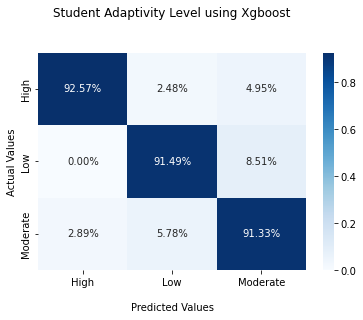

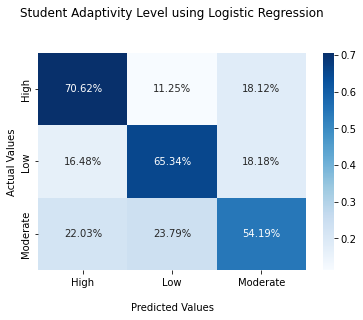

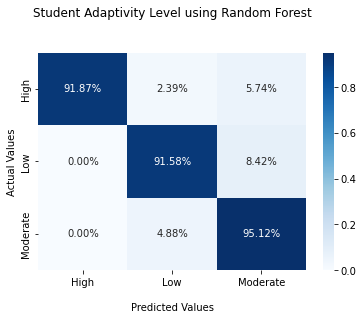

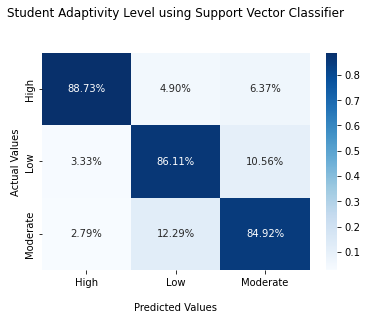

In [30]:
# xgb
xgb_y_pred = grid_xgb.predict(X_test)
xgb_cm = confusion_matrix(xgb_y_pred,Y_test)

percent_matrix = []
for i in range(len(xgb_cm)):
    percent_matrix.append(cm[i]/sum(xgb_cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level using Xgboost\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

data = percent_matrix
fig = px.imshow(data,text_auto='.2%', width=800, height=800, title="Student Adaptivity Level precentges using Xgb", labels=dict(x="Predicted Values", y="Actual Values"),x=["High","Low","Moderate"],y=["High","Low","Moderate"],color_continuous_scale="Blues")

fig.write_html("precent_xgb.html")

# logistic regression
lr_y_pred = grid_lr.predict(X_test)
lr_cm = confusion_matrix(lr_y_pred,Y_test)

percent_matrix = []
for i in range(len(lr_cm)):
    percent_matrix.append(lr_cm[i]/sum(lr_cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level using Logistic Regression\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

data = percent_matrix
fig = px.imshow(data,text_auto='.2%', width=800, height=800, title="Student Adaptivity Level precentges using logistic regression", labels=dict(x="Predicted Values", y="Actual Values"),x=["High","Low","Moderate"],y=["High","Low","Moderate"],color_continuous_scale="Blues")

fig.write_html("precent_lr.html")

# random forest
rf_y_pred = grid_rf.predict(X_test)
rf_cm = confusion_matrix(rf_y_pred,Y_test)

percent_matrix = []
for i in range(len(rf_cm)):
    percent_matrix.append(rf_cm[i]/sum(rf_cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level using Random Forest\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

data = percent_matrix
fig = px.imshow(data,text_auto='.2%', width=800, height=800, title="Student Adaptivity Level precentges using random forest", labels=dict(x="Predicted Values", y="Actual Values"),x=["High","Low","Moderate"],y=["High","Low","Moderate"],color_continuous_scale="Blues")

fig.write_html("precent_rf.html")

# SVC
svc_y_pred = grid_svc.predict(X_test)
svc_cm = confusion_matrix(svc_y_pred,Y_test)

percent_matrix = []
for i in range(len(svc_cm)):
    percent_matrix.append(svc_cm[i]/sum(svc_cm[i]))

ax = sns.heatmap(percent_matrix, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Student Adaptivity Level using Support Vector Classifier\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(["High","Low","Moderate"])
ax.yaxis.set_ticklabels(["High","Low","Moderate"])

plt.show()

data = percent_matrix
fig = px.imshow(data,text_auto='.2%', width=800, height=800, title="Student Adaptivity Level precentges using SVC", labels=dict(x="Predicted Values", y="Actual Values"),x=["High","Low","Moderate"],y=["High","Low","Moderate"],color_continuous_scale="Blues")

fig.write_html("precent_svc.html")